In [0]:
# Selecting TensorFlow Version 2
%tensorflow_version 2.x
#!pip show tensorflow

In [0]:
# Importing all the required libraries
import cv2
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [0]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# Image Preprocessing Function
def image_preprocessing(image):
   
    # Defining how many pixels to slice off from the sides of the original image
    crop_percent = 0.10
    row_crop = int(image.shape[1] * crop_percent)
    col_crop = int(image.shape[0] * crop_percent)
    
    # Subtracting the row_crop from top/bottom and col_crop from left/right
    cropped_img = np.copy(image)
    cropped_img = cropped_img[row_crop:-row_crop, col_crop:-col_crop, :]
    
    # Resizing to new required dimension
    preprocessed_img = cv2.resize(cropped_img, (32, 32))
    
    return preprocessed_img

In [0]:
# Function to decode the prediction array to label according to the threshold given
def decode_label(label):

  # Taking threshold of 90% i.e. 0.9
  thres = 0.9
  decoded_label = ''
  if label[0] >= thres:
    decoded_label = 'Red'
  elif label[1] >= thres:
    decoded_label = 'Yellow'
  elif label[2] >= thres:
    decoded_label = 'Green'
  else:
    decoded_label = 'Not a Traffic Light Color'
  
  return decoded_label

In [0]:
# Function to load data into an array
def load_dataset(image_dir):
  
  data = []  
  # Iterating through each '*.jpg' file
  for file in glob.glob(os.path.join(image_dir, '*.jpg')):
    image = mpimg.imread(file)
    
    # Changing the 4 channel image to 3 channel 
    if image.shape[2] != 3:
      image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    if not image is None:
      data.append(image_preprocessing(image))
      
  return data

In [0]:
common_path = './gdrive/My Drive/Colab Notebooks/Traffic Light Classifier/'
# Testing Image data directory
test_image_dir = common_path + 'Testing Images'

In [0]:
# Loading testing images to an array
loaded_data = load_dataset(test_image_dir)
random.shuffle(loaded_data)

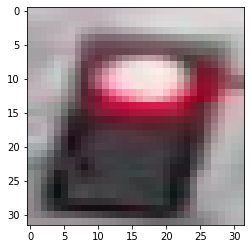

In [0]:
# Randomly display an image from the loaded_data
plt.imshow(loaded_data[10])

In [0]:
# Loading the saved trained model
model = tf.keras.models.load_model(os.path.join(common_path, 'TensorFlow Models/cnn_model-10-epochs-traffic-light.h5'))

In [0]:
# Converting the list to an array and changing the type to float
test = np.asarray(loaded_data, np.float)
# Normalizing the pixels
test /= 255

In [0]:
print(test)

[[[[0.7254902  0.74509804 0.76470588]
   [0.71764706 0.7372549  0.75686275]
   [0.70980392 0.72941176 0.75294118]
   ...
   [0.66666667 0.68235294 0.7254902 ]
   [0.64313725 0.65882353 0.69803922]
   [0.63921569 0.65490196 0.68627451]]

  [[0.76078431 0.78039216 0.80392157]
   [0.77647059 0.79607843 0.81960784]
   [0.79215686 0.81176471 0.83529412]
   ...
   [0.71372549 0.72941176 0.77254902]
   [0.79607843 0.81176471 0.85098039]
   [0.8745098  0.89019608 0.9254902 ]]

  [[0.88235294 0.90196078 0.93333333]
   [0.88627451 0.90588235 0.9372549 ]
   [0.89019608 0.91372549 0.94901961]
   ...
   [0.7372549  0.75294118 0.79607843]
   [0.78823529 0.80392157 0.84705882]
   [0.82745098 0.84313725 0.87843137]]

  ...

  [[0.6627451  0.6627451  0.71764706]
   [0.72156863 0.72156863 0.77647059]
   [0.79607843 0.8        0.85490196]
   ...
   [0.35294118 0.5254902  0.5372549 ]
   [0.39215686 0.51764706 0.54117647]
   [0.41960784 0.50980392 0.54117647]]

  [[0.5254902  0.53333333 0.58431373]
   [0.5

In [0]:
# Predicting the Results
predictions = model.predict(test)

In [0]:
print(predictions)

[[1.46788225e-05 2.63170773e-06 9.99982715e-01]
 [2.35048077e-07 1.38318057e-07 9.99999642e-01]
 [1.93091000e-06 9.99990702e-01 7.38432254e-06]
 [1.44665231e-04 9.99398470e-01 4.56858543e-04]
 [3.48673129e-05 8.52204903e-05 9.99879956e-01]
 [5.07303746e-04 9.78162825e-01 2.13298630e-02]
 [1.00000000e+00 2.58143373e-08 2.16993676e-08]
 [9.99995708e-01 8.82439906e-07 3.48460003e-06]
 [9.99999881e-01 1.07517426e-08 1.03550313e-07]
 [4.78038914e-04 9.24777627e-01 7.47443289e-02]
 [9.99566019e-01 4.32338449e-04 1.71941849e-06]
 [1.72230546e-04 9.99600470e-01 2.27333934e-04]
 [2.33257128e-06 1.54502663e-06 9.99996066e-01]
 [9.79182541e-01 2.08006725e-02 1.68218121e-05]
 [4.97699830e-07 7.19889499e-07 9.99998808e-01]
 [9.99999642e-01 6.62106530e-08 2.71454098e-07]
 [1.34228401e-07 1.58849289e-07 9.99999762e-01]]


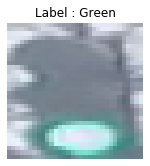

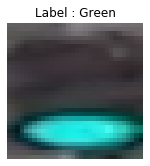

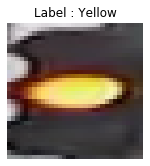

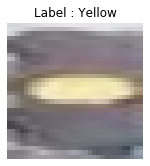

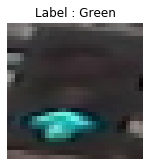

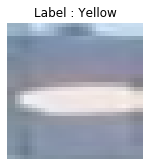

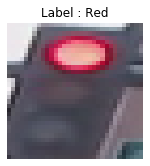

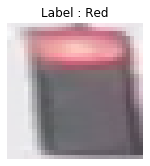

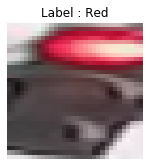

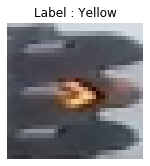

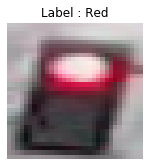

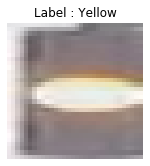

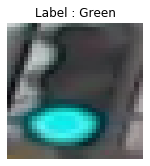

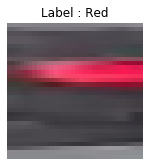

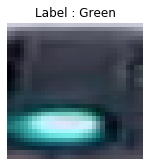

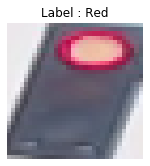

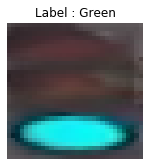

In [0]:
# Displaying images along with the predictions
for i in range(len(predictions)):
  image = loaded_data[i]
  label = predictions[i]
    
  fig = plt.figure(figsize = (2.5, 2.5))
  plt.imshow(image)
  plt.title('Label : {}'.format(decode_label(label)))
  plt.axis('OFF')